<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Medidas_de_Desempe%C3%B1o_APTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy-financial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy_financial as npf

In [12]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Control de Comisión.xlsm to Control de Comisión.xlsm


In [13]:
BASE_SNAP = pd.read_excel("/content/Control de Comisión.xlsm", sheet_name="Base Snap",skiprows=1)
Indices= pd.read_excel("/content/Base Indices.xlsx", sheet_name="Datos")

In [55]:
# Definir una lista de tuplas con los nombres y números de columna
dataframes_info = [
    ("GYC", 2),
    ("ECL", 164),
    ("CDV", 29),
    ("FJM", 218),
    ("MLT", 515),
    ("AVV", 542),
    ("FDP", 731),
    ("INA", 758),
    ("FJJ", 866),
    ("BAT", 920),
    ("FTC", 947),
    ("FIN", 974)
]
# Crear una lista para almacenar los DataFrames resultantes
dataframes = []

# Iterar sobre la lista de tuplas y crear los DataFrames
for name, col_num in dataframes_info:
    df = BASE_SNAP.iloc[:, [0, col_num]]
    df.columns = ["Fecha", "Valor_Unidad"]
    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
    dataframes.append((name, df))

# Ahora puedes acceder a los DataFrames individuales usando sus nombres
GYC = dataframes[0][1]
ECL = dataframes[1][1]
CDV = dataframes[2][1]
FJM = dataframes[3][1]
MLT = dataframes[4][1]
AVV = dataframes[5][1]
FDP = dataframes[6][1]
INA = dataframes[7][1]
FJJ = dataframes[8][1]
BAT = dataframes[9][1]
FTC = dataframes[10][1]
FIN = dataframes[11][1]

<ipython-input-55-dbed3329eb89>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
<ipython-input-55-dbed3329eb89>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
<ipython-input-55-dbed3329eb89>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [56]:
# Crear un diccionario para almacenar las fechas y valores de unidad de los últimos 5 valores de cada DataFrame
ultimos_valores = {}
# Iterar sobre la lista de DataFrames y obtener los últimos 5 valores
for name, df in dataframes:
    ultimos_valores[name] = df["Valor_Unidad"].tolist()
# Crear un DataFrame con los valores de unidad de los últimos 5 valores de cada DataFrame
APTs = pd.DataFrame(ultimos_valores)
# Agregar las fechas como índice
APTs.index = df["Fecha"].tolist()
# Mostrar el DataFrame de los últimos valores de forma horizontal
APTs

,GYC,ECL,CDV,FJM,MLT,AVV,FDP,INA,FJJ,BAT,FTC,FIN
2022-12-31,1930.07,1279.65,1858.85,1440.10,884.80,1336.70,1204.70,1071.25,1156.74,1050.981935,NaN,NaN
2023-01-01,1931.00,1280.02,1859.07,1440.77,884.84,1337.10,1205.29,1071.54,1157.29,1051.418015,NaN,NaN
2023-01-02,1932.99,1283.06,1861.52,1442.21,888.51,1337.72,1206.40,1075.70,1158.01,1052.223938,NaN,NaN
2023-01-03,1933.64,1280.38,1862.23,1442.76,891.63,1336.62,1206.83,1070.74,1158.18,1051.942295,NaN,NaN
2023-01-04,1934.85,1285.05,1862.92,1443.74,900.35,1338.15,1207.43,1078.14,1158.92,1053.230525,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,2249.90,1371.01,2050.34,1622.58,836.20,1471.07,1387.15,1135.04,1273.42,1152.450000,1012.10,1013.88
2023-08-28,2254.29,1373.61,2054.44,1626.20,837.62,1475.73,1389.54,1137.44,1275.05,1154.810000,1013.43,1014.55
2023-08-29,2261.16,1382.11,2064.90,1628.13,838.17,1477.88,1400.52,1141.98,1275.47,1156.550000,1017.18,1018.97
2023-08-30,2266.46,1387.73,2071.18,1632.14,837.86,1481.71,1406.48,1145.18,1279.29,1160.520000,1020.82,1022.67


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(APTs, *['GYC'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(APTs, *['ECL'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(APTs, *['CDV'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(APTs, *['FJM'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(APTs, *['GYC'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(APTs, *['ECL'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(APTs, *['CDV'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(APTs, *['FJM'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(APTs, *[[['GYC', 'ECL'], ['ECL', 'CDV'], ['CDV', 'FJM'], ['FJM', 'MLT']]], **{})
chart

In [57]:
# Importar la biblioteca pandas
import pandas as pd

# Supongamos que tienes un DataFrame llamado APTs
# con las columnas GYC, CDV, FJM, FDP, FIB, AVV, ECL, BAT, FIN, FTC, INA, MLT

# Crear tres DataFrames separados para cada categoría
df_conservador = APTs[['GYC', 'CDV', 'FJM', 'FDP']]
df_moderado = APTs[['AVV', 'ECL', 'BAT', 'FIN', 'FTC']]
df_agresivo = APTs[['INA', 'MLT']]

# Puedes imprimir cada DataFrame para verificar los resultados
print("DataFrame Conservador:")
print(df_conservador)

print("\nDataFrame Moderado:")
print(df_moderado)

print("\nDataFrame Agresivo:")
print(df_agresivo)

DataFrame Conservador:
                GYC      CDV      FJM      FDP
2022-12-31  1930.07  1858.85  1440.10  1204.70
2023-01-01  1931.00  1859.07  1440.77  1205.29
2023-01-02  1932.99  1861.52  1442.21  1206.40
2023-01-03  1933.64  1862.23  1442.76  1206.83
2023-01-04  1934.85  1862.92  1443.74  1207.43
...             ...      ...      ...      ...
2023-08-27  2249.90  2050.34  1622.58  1387.15
2023-08-28  2254.29  2054.44  1626.20  1389.54
2023-08-29  2261.16  2064.90  1628.13  1400.52
2023-08-30  2266.46  2071.18  1632.14  1406.48
2023-08-31  2269.54  2074.21  1634.08  1408.19

[244 rows x 4 columns]

DataFrame Moderado:
                AVV      ECL          BAT      FIN      FTC
2022-12-31  1336.70  1279.65  1050.981935      NaN      NaN
2023-01-01  1337.10  1280.02  1051.418015      NaN      NaN
2023-01-02  1337.72  1283.06  1052.223938      NaN      NaN
2023-01-03  1336.62  1280.38  1051.942295      NaN      NaN
2023-01-04  1338.15  1285.05  1053.230525      NaN      NaN
...     

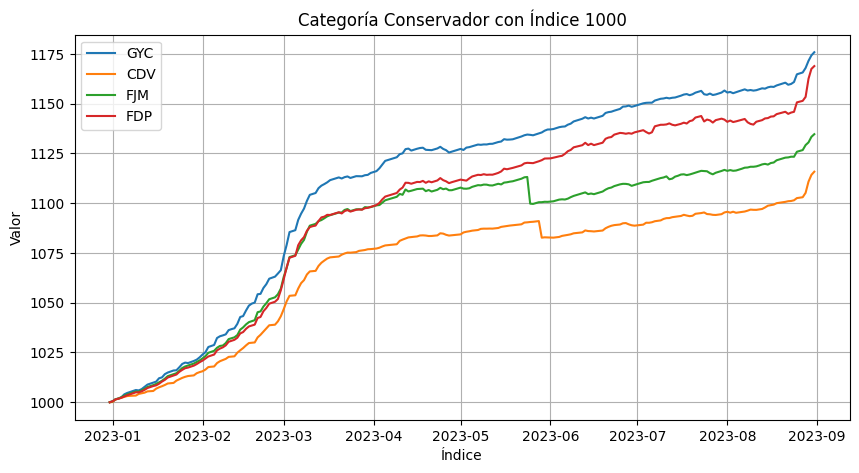

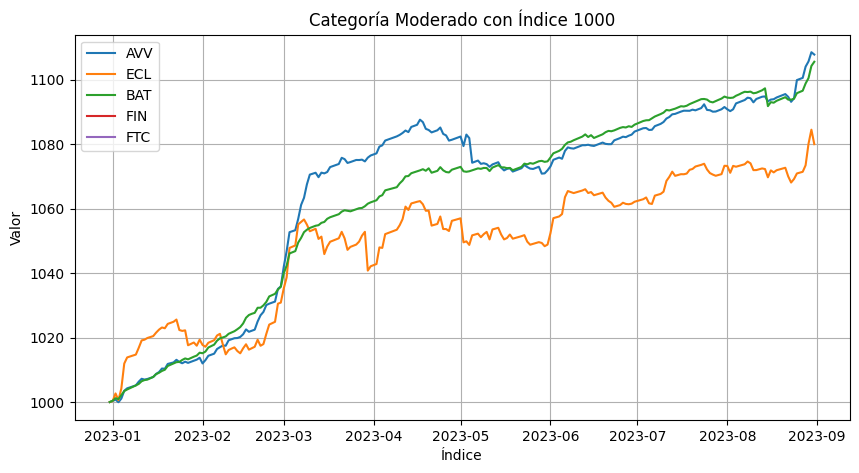

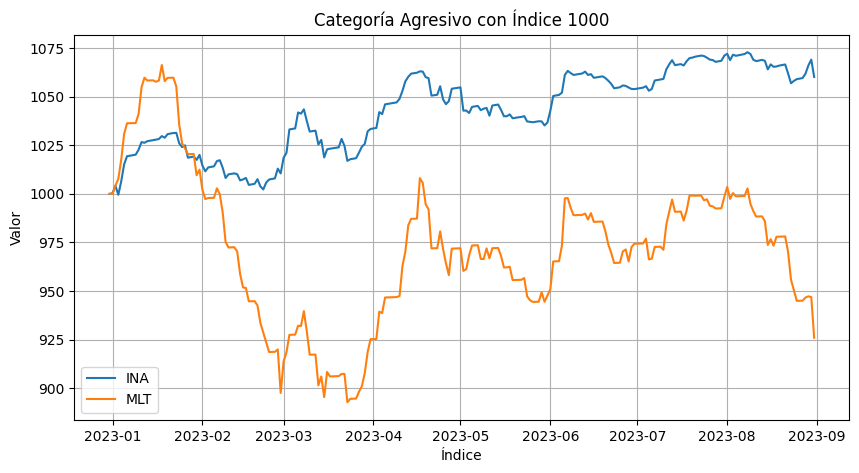

In [58]:
# Ajusta los valores de cada categoría para que tengan un índice común de 1000
indice_base = 1000

df_conservador = df_conservador / df_conservador.iloc[0] * indice_base
df_moderado = df_moderado / df_moderado.iloc[0] * indice_base
df_agresivo = df_agresivo / df_agresivo.iloc[0] * indice_base

# Gráfica de líneas para la categoría "Conservador"
plt.figure(figsize=(10, 5))
for col in df_conservador.columns:
    plt.plot(df_conservador.index, df_conservador[col], label=col)

plt.title('Categoría Conservador con Índice 1000')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()

# Gráfica de líneas para la categoría "Moderado"
plt.figure(figsize=(10, 5))
for col in df_moderado.columns:
    plt.plot(df_moderado.index, df_moderado[col], label=col)

plt.title('Categoría Moderado con Índice 1000')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()

# Gráfica de líneas para la categoría "Agresivo"
plt.figure(figsize=(10, 5))
for col in df_agresivo.columns:
    plt.plot(df_agresivo.index, df_agresivo[col], label=col)

plt.title('Categoría Agresivo con Índice 1000')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()


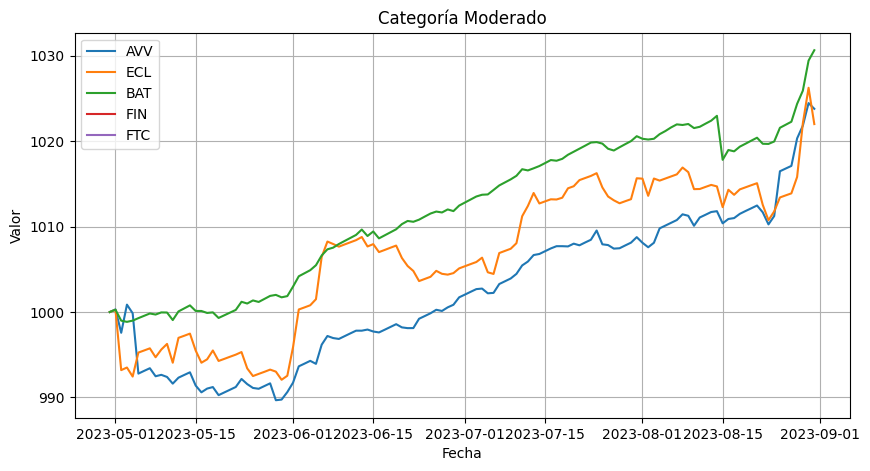

In [63]:
# Supongamos que tienes un DataFrame llamado df con una columna "Fecha" en el formato adecuado.
# Asegúrate de que la columna "Fecha" sea el índice del DataFrame.

# Filtrar las filas a partir del 27 de abril de 2023
fecha_inicio = pd.Timestamp('2023-04-30')
df_moderado_desde_2023 = df_moderado[df_moderado.index >= fecha_inicio]

# Ajustar los valores para que tengan un índice común de 1000 a partir de la fecha seleccionada
indice_base = 1000
df_moderado_desde_2023 = df_moderado_desde_2023 / df_moderado_desde_2023.iloc[0] * indice_base

# Gráfico de líneas para la categoría "Moderado" desde el 27 de abril de 2023
plt.figure(figsize=(10, 5))
for col in df_moderado_desde_2023.columns:
    plt.plot(df_moderado_desde_2023.index, df_moderado_desde_2023[col], label=col)

plt.title('Categoría Moderado')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()

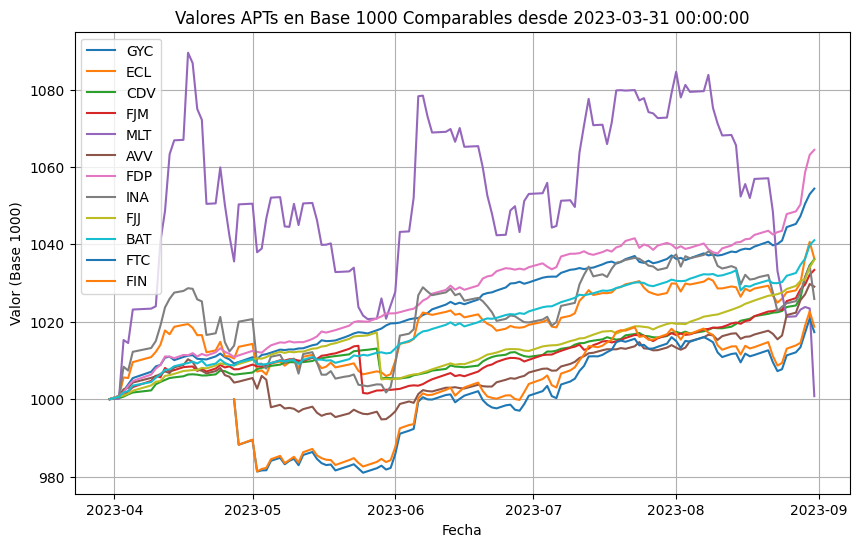

In [24]:
# Encuentra la fecha en la que todos los valores comienzan (la primera fecha en la que todos los valores están presentes)
fecha_inicio = APTs.dropna().index[0]

# Filtra el DataFrame a partir de la fecha de inicio
APTs_filtrados = APTs.loc[fecha_inicio:]

# Divide todos los valores por el primer valor y luego multiplica por 1000 para que todos los valores comiencen en 1000
APTs_comparables = (APTs_filtrados / APTs_filtrados.iloc[0]) * 1000
# Grafica los valores
plt.figure(figsize=(10, 6))
for column in APTs_comparables.columns:
    plt.plot(APTs_comparables.index, APTs_comparables[column], label=column)
plt.title('Valores APTs en Base 1000 Comparables desde {}'.format(fecha_inicio))
plt.xlabel('Fecha')
plt.ylabel('Valor (Base 1000)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular la TIR diaria y mensual para cada columna
def calcular_tir_diaria(valor):
    return (1 + valor) ** (1/30) - 1

def calcular_tir_mensual(valor):
    return (1 + valor) ** 30 - 1

# Crear nuevas columnas con TIR diaria y mensual para cada nombre
for columna in APTs.columns:
    APTs[columna + '_TIR_DIARIA'] = APTs[columna].apply(calcular_tir_diaria)
    APTs[columna + '_TIR_MENSUAL'] = APTs[columna].apply(calcular_tir_mensual)

# Imprimir el DataFrame resultante
print(APTs)

# **Libre Riesgo**

In [26]:
# Crea un DataFrame con BANREP
Banrep = Indices.iloc[:, [0, 4]]  # Columnas 1 (fecha) y 3 (valor de la unidad)
Banrep.columns = ["Fecha", "BANREP"]
# Convierte la columna de fecha a datetime, ignorando errores
Banrep["Fecha"] = pd.to_datetime(Banrep["Fecha"], errors="coerce")

<ipython-input-26-67447ff1a4fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Banrep["Fecha"] = pd.to_datetime(Banrep["Fecha"], errors="coerce")


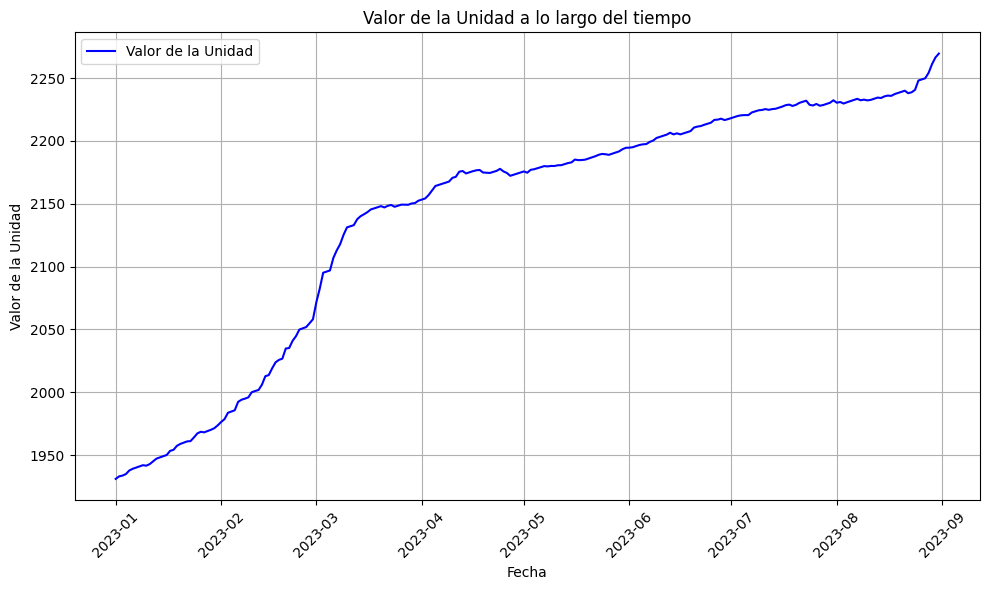

In [27]:
# Suponiendo que ya tienes GYC definido como DataFrame
plt.figure(figsize=(10, 6))  # Tamaño opcional para la figura
# Graficar los datos
plt.plot(GYC["Fecha"], GYC["Valor_Unidad"], linestyle='-', color='b', label='Valor de la Unidad')
# Configuraciones de la gráfica
plt.title('Valor de la Unidad a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Unidad')
plt.legend()
plt.grid(True)
# Rotar las etiquetas del eje x para una mejor visualización de las fechas
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.tight_layout()  # Ajusta el diseño para evitar recorte de etiquetas
plt.show()

<ipython-input-28-d49aa3b6199a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GYC["Rendimientos"] = GYC["Valor_Unidad"].pct_change()


Sharpe Ratio: -51.7931442402366


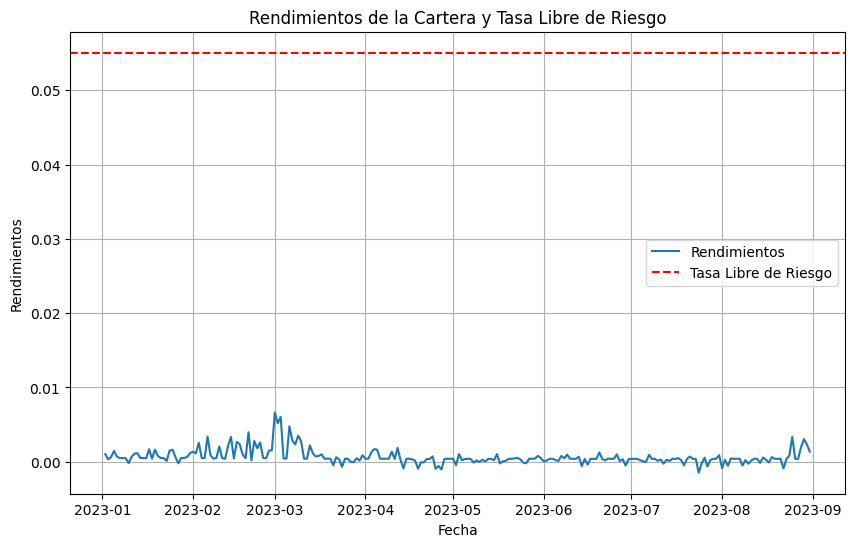

In [28]:
# Calcula los rendimientos diarios
GYC["Rendimientos"] = GYC["Valor_Unidad"].pct_change()
# Elimina la primera fila que tendrá NaN debido a los rendimientos
GYC = GYC.dropna()
# Calcula el rendimiento promedio y la desviación estándar de los rendimientos
rendimiento_promedio = GYC["Rendimientos"].mean()
desviacion_estandar_rendimientos = GYC["Rendimientos"].std()
# Tasa libre de riesgo
tasa_libre_riesgo = Banrep["BANREP"].mean() / 100  # Suponiendo que los valores están en porcentaje
# Calcula el Sharpe Ratio
sharpe_ratio = (rendimiento_promedio - tasa_libre_riesgo) / desviacion_estandar_rendimientos
# Imprime el Sharpe Ratio
print("Sharpe Ratio:", sharpe_ratio)
# Gráfica de los rendimientos
plt.figure(figsize=(10, 6))
plt.plot(GYC["Fecha"], GYC["Rendimientos"], label="Rendimientos")
plt.axhline(y=tasa_libre_riesgo, color='r', linestyle='--', label="Tasa Libre de Riesgo")
plt.xlabel("Fecha")
plt.ylabel("Rendimientos")
plt.title("Rendimientos de la Cartera y Tasa Libre de Riesgo")
plt.legend()
plt.grid(True)
plt.show()